# Revisão de Python (versão 3) - Semana 2

## O que vamos recordar (aprender?):

- Módulos: *Matplotlib* e *Numpy*
    - Gráficos com Matplotlib
    - Arrays eficientes com Numpy

- Dicionários e Conjuntos
- Medindo tempo (módulo *timeit*)




***

## Matplotlib

[Matplotlib](https://matplotlib.org/) fornece comandos para produção de gráficos e visualizações que podem ser incorporados em aplicações, exibidos na tela ou gerados como arquivos de imagem de alta qualidade para ilustrar textos em geral (artigos, livros, etc). Como tudo em Python é uma biblioteca orientada a objeto, e funciona muito bem em cojunto com a biblioteca `Numpy`. Vamos começar importanto ambos os módulos. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### O básico 

#### Gráficos de linha e gráficos de dispersão (*scatter plot*) 

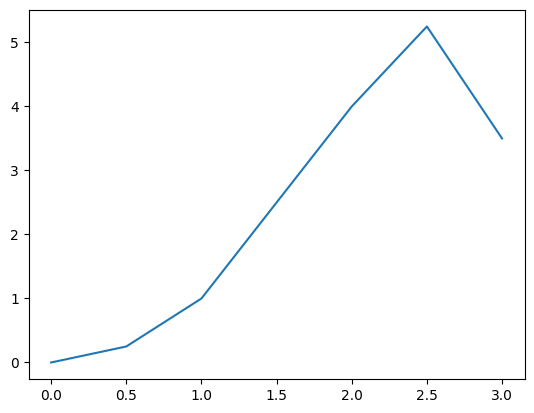

In [2]:
x = [0., 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y = [0.0, 0.25, 1.0, 2.5, 4.0, 5.25, 3.5]
plt.plot(x,y)
plt.show()

Obs: Chamamos plot com listas de números, porém será mais comum chamar com numpy arrays.

O comando `plt.plot` cria um objeto do Matplotlib e o comando `plt.show` o mostra na tela. Para traçar um diagrama de dispersão (scatter plot) usamos o comando `plt.scatter`:

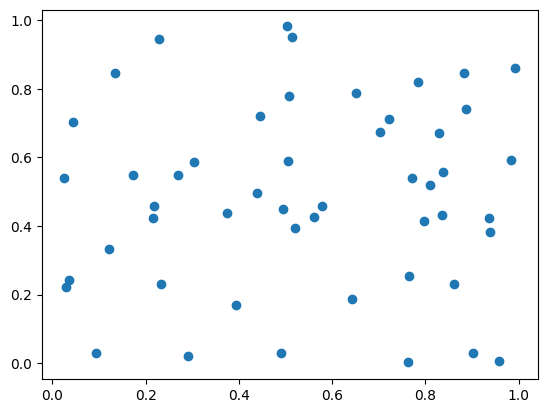

In [3]:
import random as rnd
rnd.seed(1) #para reproducibilidade 

x, y = [], []
for i in range(50):
    x.append(rnd.random())
    y.append(rnd.random())
    
plt.scatter(x,y)
plt.show()

**Investigue:**  O que fazem os comandos `rnd.seed` e `rnd.random`.

Vejamos agora como esboçar o gráfico de uma função, neste caso, a função $y = \cos^2(x)$ para $-2\pi \leq x \leq 2\pi$. Para fazer isso precisamos de uma malha de pontos (*grid* ou *mesh* ou *meshgrid*) no domínio, neste caso faremos uma malha com $n$ pontos dividindo o intervalo $[-2\pi, 2\pi]$ em $n-1$ subintervalos igualmente espaçados.

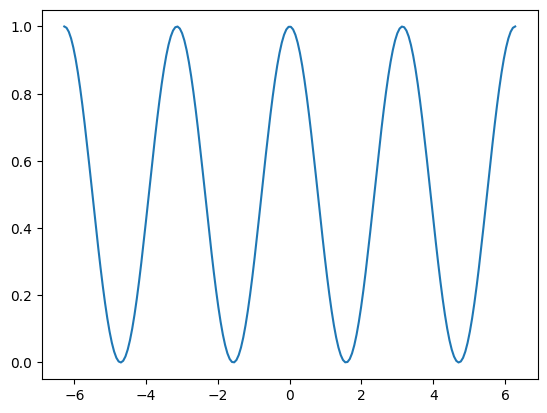

In [4]:
import math
xmin, xmax = -2.*math.pi, 2.*math.pi
n = 200

x = [0.] * n
y = [0.] * n
dx = (xmax - xmin)/(n-1)

for i in range(n):
    xpt = xmin + i*dx
    x[i] = xpt
    y[i] = math.cos(xpt)**2
    
plt.plot(x,y)
plt.show()

#### `linspace` e Vetorização

O código acima funciona, mas sua lógica é tão usual que obviamente devemos ter jeitos mais simples para gerar as malhas (listas) de pontos para passarmos para a função `plot`. Aqui entra o [Numpy](https://numpy.org/) em ação. Primeiramente usaremos a função `linspace` do numpy, e depois usaremos as funções matemáticas também do numpy, que oferecem a possibilidade de vetorização. 

In [6]:
n = 200
x = np.linspace(xmin,xmax,n)
print(x)
type(x)

[-6.28318531 -6.22003772 -6.15689013 -6.09374253 -6.03059494 -5.96744735
 -5.90429976 -5.84115217 -5.77800458 -5.71485699 -5.6517094  -5.58856181
 -5.52541421 -5.46226662 -5.39911903 -5.33597144 -5.27282385 -5.20967626
 -5.14652867 -5.08338108 -5.02023349 -4.9570859  -4.8939383  -4.83079071
 -4.76764312 -4.70449553 -4.64134794 -4.57820035 -4.51505276 -4.45190517
 -4.38875758 -4.32560999 -4.26246239 -4.1993148  -4.13616721 -4.07301962
 -4.00987203 -3.94672444 -3.88357685 -3.82042926 -3.75728167 -3.69413408
 -3.63098648 -3.56783889 -3.5046913  -3.44154371 -3.37839612 -3.31524853
 -3.25210094 -3.18895335 -3.12580576 -3.06265816 -2.99951057 -2.93636298
 -2.87321539 -2.8100678  -2.74692021 -2.68377262 -2.62062503 -2.55747744
 -2.49432985 -2.43118225 -2.36803466 -2.30488707 -2.24173948 -2.17859189
 -2.1154443  -2.05229671 -1.98914912 -1.92600153 -1.86285394 -1.79970634
 -1.73655875 -1.67341116 -1.61026357 -1.54711598 -1.48396839 -1.4208208
 -1.35767321 -1.29452562 -1.23137803 -1.16823043 -1.

numpy.ndarray

Note o tipo de `x` agora, ele é do tipo `numpy.ndarray`, que se comporta como uma lista porém é uma implementação eficiente de arrays n-dimensionais (ndarrays). Tentemos agora usar a função `math.cos` tendo `x` como entrada

In [67]:
# y = math.cos(x)**2

<class 'numpy.ndarray'>


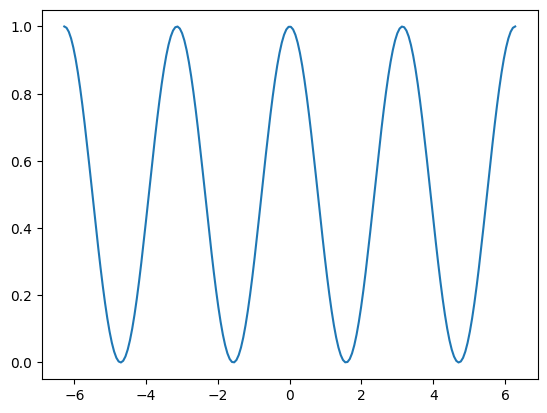

In [7]:
y = np.cos(x)**2
print(type(y))
plt.plot(x,y)
plt.show()

Na célula acima vemos que a função `np.cos` aceitou o array `x` retornando igualmente um ndarray. Isso é o que chamamos de **vetorização**. Vejamos mais um exemplo abaixo, onde queremos multiplicar os elementos de uma lista por um número.

In [69]:
w = [1. , 2., 3., 4.]
# 5.*w  #note 5*w funciona mas o comportamento não é o que queríamosS

In [70]:
w = np.array(w)
5.*w

array([ 5., 10., 15., 20.])

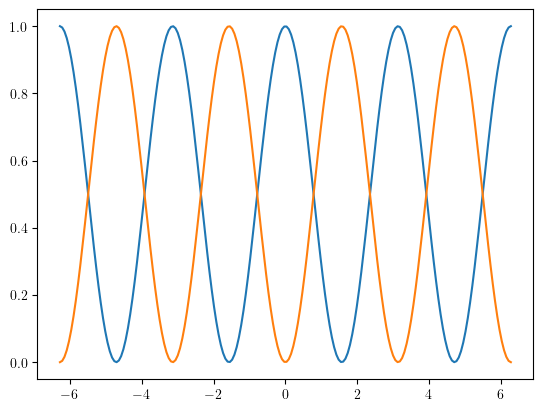

In [71]:
x = np.linspace(xmin,xmax,200)
y1 = np.cos(x)**2
y2 = np.sin(x)**2
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [72]:
#Uma vez que um gráfico foi exibido com show() ele não está disponível para uma segunda exibição, é necessário chamar plt.plot() novamente
plt.show()

### Legendas, Labels e Customização

Vejamos agora como colocar informações no gráfico para que ele seja legível e informativo.

In [73]:
plt.plot(x,y1, label='cos^2(x)')
plt.legend()
plt.show()

RuntimeError: latex was not able to process the following string:
b'cos^2(x)'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp0yv4xzqn 73fa578781a8854b9d025a47b98bfa0e.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./73fa578781a8854b9d025a47b98bfa0e.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 73fa578781a8854b9d025a47b98bfa0e.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.29 {\sffamily cos^
                    2(x)}%
No pages of output.
Transcript written on tmp0yv4xzqn/73fa578781a8854b9d025a47b98bfa0e.log.




<Figure size 640x480 with 1 Axes>

A posição da legenda pode ser customizada pelo argumento `loc` do método `plt.legend`

In [74]:
plt.plot(x,y1, label='cos^2(x)')
plt.legend(loc='upper right')
#plt.legend(loc='lower left')
plt.show()

RuntimeError: latex was not able to process the following string:
b'cos^2(x)'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmph3mjh3wz 73fa578781a8854b9d025a47b98bfa0e.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./73fa578781a8854b9d025a47b98bfa0e.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 73fa578781a8854b9d025a47b98bfa0e.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.29 {\sffamily cos^
                    2(x)}%
No pages of output.
Transcript written on tmph3mjh3wz/73fa578781a8854b9d025a47b98bfa0e.log.




<Figure size 640x480 with 1 Axes>

Colocando título e nome nos eixos:

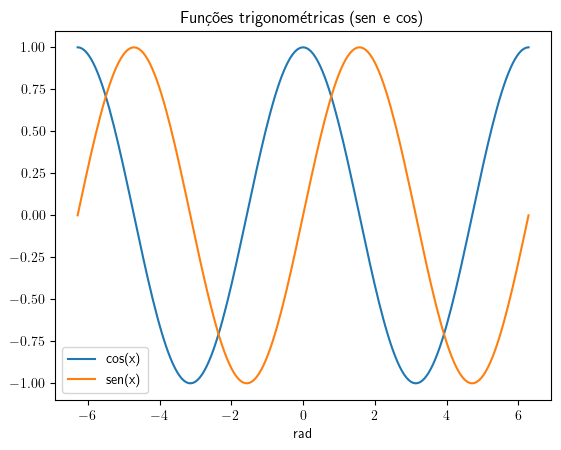

In [75]:
y1 = np.cos(x)
y2 = np.sin(x)
plt.plot(x,y1, label='cos(x)')
plt.plot(x,y2, label='sen(x)')
#plt.legend(loc='upper right')
plt.legend()
plt.title('Funções trigonométricas (sen e cos)')
plt.xlabel('rad', fontsize=10.) 
plt.show()

Podemos usar $LaTex$ e seus comandos para renderizar as fontes dos gráficos, para isso precisamos indicar o que queremos usar e usar *raw strings* nos argumentos. Vejamos

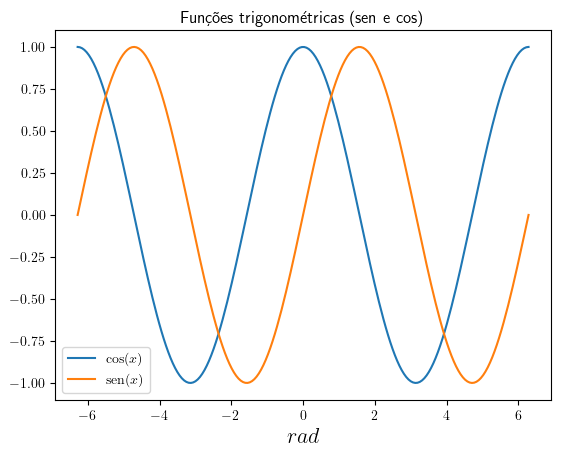

In [76]:
plt.rc('text', usetex=True)
y1 = np.cos(x)
y2 = np.sin(x)
plt.plot(x,y1, label=r'$\cos(x)$')
plt.plot(x,y2, label=r'$\textrm{sen}(x)$') #Note que na lingua inglesa poderiamos ter usado /sin porém o comando /sen não existe
#plt.legend(loc='upper right')
plt.legend()
plt.title('Funções trigonométricas (sen e cos)')
plt.xlabel(r'$rad$', fontsize=16.) 
plt.show()

#Observação: Na primeira vez que você chamar pode demorar um pouco pedindo para instalar vários pacotes do Latex

Mais um exemplo e como podemos salvar como uma figura para colocar em algum documento.

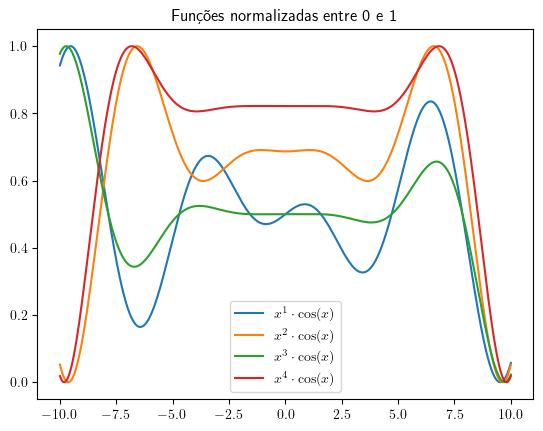

In [77]:
x = np.linspace(-10,10,1000)
for n in range(1,5):
    y = x**n * np.cos(x)
    ymax = max(y)
    ymin = min(y)
    y = (y - ymin)/(ymax - ymin) #normalização
    plt.plot(x,y, label=r'$x^{} \cdot \cos(x)$'.format(n))
plt.legend(loc='lower center')
plt.title('Funções normalizadas entre 0 e 1')
plt.savefig('grafico.png')
plt.savefig('grafico.pdf')
plt.show()

#### Customizando ainda mais os gráficos (Marcadores, Cores, Estilo de Linha e Comprimento)

Por padrão o `plot` produz um gráfico linha sem marcadores nos pontos do gráfico. Para adicionar marcadores precisamos usar o argumento `marker` (a lista completa está [aqui](https://matplotlib.org/stable/api/markers_api.html)). 

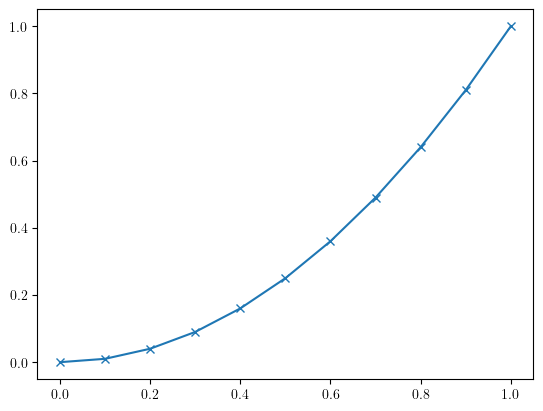

In [78]:
markers_opt = ['.','o','+','x','D','v','^','S','*']
x = np.linspace(0,1,11)
y = x**2
plt.plot(x,y,marker=markers_opt[3])  #Experimente as diferentes opções
plt.show()

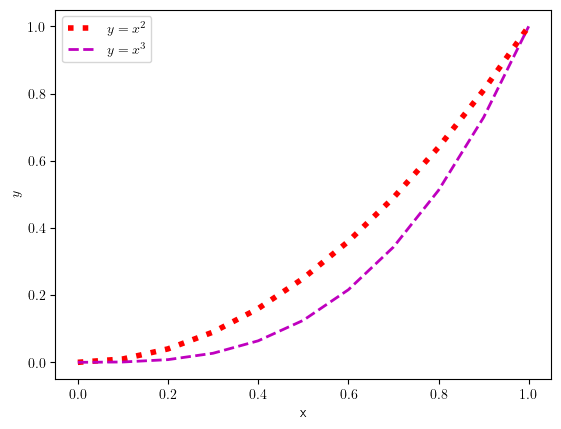

In [79]:
y2 = x**2 
y3 = x**3 
plt.plot(x, y2, color='r', linestyle=':', linewidth=4., label=r'$y = x^2$') 
plt.plot(x, y3, color='m', linestyle='--', linewidth=2., label=r'$y = x^3$')
plt.xlabel('x')
plt.ylabel(r'$y$') #veja a diferença no gráfico
plt.legend()
plt.show()

As diversas opções de cores pode serem vistas [aqui](https://matplotlib.org/stable/gallery/color/named_colors.html). As demais propriedades podem (e devem) ser lidas na documentação do [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) 

***

### Uma aplicação sobre a Lei de Moore (Moore's law)

A lei de Moore

> é uma observação feita por Gordon E. Moore, cofundador da Intel, que previa que o número de transistores em um processador dobraria a cada dois anos.

Mais informações em língua Portuguesa pode ser lida na [postagem do Tecnoblog](https://tecnoblog.net/responde/o-que-diz-a-lei-de-moore/), de onde a frase acima foi retirada. Porém melhor ainda é a página sobre o assunto na [Wikipedia](https://en.wikipedia.org/wiki/Moore%27s_law), na língua Inglesa. Lá podemos encontrar o gráfico

<p><a href="https://commons.wikimedia.org/wiki/File:Moore%27s_Law_Transistor_Count_1970-2020.png#/media/File:Moore's_Law_Transistor_Count_1970-2020.png"><img src="https://upload.wikimedia.org/wikipedia/commons/0/00/Moore%27s_Law_Transistor_Count_1970-2020.png" alt="refer to caption" height="720" width="973"></a></p>

Mostraremos agora um *pipeline* (muito útil por sinal) de como extraímos dados de gráficos para criarmos o nosso próprio gráfico da Lei de Moore com uma reta preditora (em escala $\log$). De fato, a lei de Moore pode ser descrita $$n_t = n_0 2^{(t-t_0)/T_2},$$ onde $n_0$ é o número de transistores num ano de referência $t_0$ (no caso 1974), e $T_2 = 2$ é o número de anos que leva para dobrar o número. Como os dados em consideração pegam um intervalo de tempo de mais de 40 anos, os valores de $n_t$ variam em ordens de magnitude, portanto usaremos a escala logarítmica. Portanto teremos uma relação linear da forma $$\log_{10}n_t = \log_{10}n_0 +  \left( \dfrac{t-t_0}{T_2} \right) \log_{10}2.$$

Primeiramente precisamos extrair os dados do gráfico, e para isso vamos usar a ferramente online, [*WebPlotDigitizer*](https://apps.automeris.io/wpd/). E depois exportamos para um arquivo `.csv`. 

In [80]:
import csv

anos = []
ntrans = []

with open("./mooreLawIntel.csv", 'r') as file:
  csvreader = csv.reader(file,delimiter=';')
  for ano, ntran in csvreader:
    anos.append(float(ano))
    ntrans.append(float(ntran))
    
print(anos) 
print(ntrans)

[1972.2, 1974.3, 1976.3, 1977.2, 1980.5, 1983.5, 1986.7, 1987.7, 1991.9, 1994.0, 1996.1, 1997.2, 1998.2, 1999.2, 1999.2, 2000.3, 2003.4, 2004.6, 2004.4, 2005.5, 2006.5, 2007.6, 2009.6, 2013.8, 2016.0]
[4482.0, 6607.3, 27213.0, 28174.0, 128920.0, 252170.0, 251570.0, 1074200.0, 2887700.0, 5265000.0, 7230700.0, 6973500.0, 8929500.0, 20153000.0, 39504000.0, 45482000.0, 102490000.0, 145940000.0, 215500000.0, 266320000.0, 366040000.0, 716970000.0, 2224200000.0, 1257900000.0, 2939000000.0]


In [81]:
import csv

anos = []
ntrans = []

with open("./mooreLawIntel.csv", 'r') as file:
  csvreader = csv.reader(file,delimiter=';')
  for ano, ntran in csvreader:
    anos.append(round(float(ano.replace(',', '.'))))
    ntrans.append(float(ntran.replace(',', '.')))

print(anos) 
print(ntrans)

[1972, 1974, 1976, 1977, 1980, 1984, 1987, 1988, 1992, 1994, 1996, 1997, 1998, 1999, 1999, 2000, 2003, 2005, 2004, 2006, 2006, 2008, 2010, 2014, 2016]
[4482.0, 6607.3, 27213.0, 28174.0, 128920.0, 252170.0, 251570.0, 1074200.0, 2887700.0, 5265000.0, 7230700.0, 6973500.0, 8929500.0, 20153000.0, 39504000.0, 45482000.0, 102490000.0, 145940000.0, 215500000.0, 266320000.0, 366040000.0, 716970000.0, 2224200000.0, 1257900000.0, 2939000000.0]


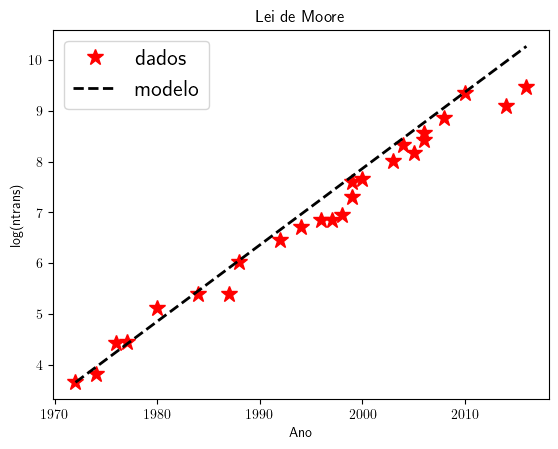

In [82]:
import numpy as np 
import matplotlib.pyplot as plt 

#Criando Numpy arrays
anos = np.array(anos)
ntrans = np.array(ntrans)

t0, n0 = anos[0], ntrans[0]

t = np.linspace(t0, anos[-1], anos[-1] - t0 + 1)

T2 = 2. 

moore = np.log10(n0) + (t - t0) / T2 * np.log10(2) 

plt.plot(anos , np.log10(ntrans), '*', markersize=12, color='r', markeredgecolor='r', label='dados') 
plt.plot(t, moore , linewidth=2, color='k', linestyle='--', label='modelo') 
plt.legend(fontsize=16, loc='upper left') 
plt.xlabel('Ano') 
plt.ylabel('log(ntrans)') 
plt.title('Lei de Moore') 
plt.show()

***

## Numpy

O principal objeto do NumPy é o `ndarray`, e as duas principais vantagens do NumPy sobre os principais objetos Python são:

- **Velocidade:** as operações NumPy são implementadas em C, que é uma linguagem compilada muito mais rápida que Python. Isso significa que o código NumPy pode ser executado muito mais rápido do que o código Python que usa listas ou outros objetos principais do Python. (veremos mais adiante quando falarmos da medição de tempo).

- **Vetorização:** NumPy suporta vetorização, o que significa que uma única operação pode ser aplicada a um array inteiro de uma só vez. Isso pode ser muito mais rápido do que fazer um loop nos elementos de uma matriz e aplicar a operação a cada elemento individualmente.

Fontes adicionais de informação são:

- O site NumPy: https://numpy.org/
- O tutorial do NumPy: https://numpy.org/doc/stable/user/quickstart.html
- A documentação do NumPy: https://numpy.org/doc/stable/

### Métodos básicos

In [83]:
import numpy as np

a = np.array( (100, 101, 102, 103) ) #podemos usar tuplas
print(a, type(a))

b = np.array( [1., 2., 3., 4.] )  #e podemos usar listas
print(b, type(b))

c = np.array([[1.,2.], [3.,4.]]) #e lista de listas
print(c, type(c))

[100 101 102 103] <class 'numpy.ndarray'>
[1. 2. 3. 4.] <class 'numpy.ndarray'>
[[1. 2.]
 [3. 4.]] <class 'numpy.ndarray'>


#### Indexação e Slicing

In [84]:
print(a[2])
print(c[1][1])
c[1,1] = 5 #atribuicao por inteiro
print(c[1,1]) #nova forma de indexação (mais próxima da notação matemática)

102
4.0
5.0


Note que na célula acima usei uma atribuição por um inteiro `c[1,1] = 5` mas na exibição apareceu `5.0`, isso porque diferente de listas um NumPy array **não** admite elementos de tipos diferentes. O NumPy oferece uma diversidade de objetos do tipo `dtype` (*data type*) que pode ser passado como argumento na hora da criação, ou como vimos, ele próprio faz o *typecast* (ou *upcast* uma vez que Python é orientado a objeto) na hora da atribuição.

In [85]:
print(a.dtype) #atributo dtype do objeto numpy.ndarray
print(b.dtype)

d = np.array( [0, 4, -4], dtype=complex) #perc
print(d, d.dtype)

int64
float64
[ 0.+0.j  4.+0.j -4.+0.j] complex128


##### Observação: 
> Data type é um aspecto importante do NumPy. A lista completa de tipos de dados pode ser lida na [documentação](https://numpy.org/doc/stable/user/basics.types.html).

In [86]:
#x = np.linspace(1, 12, 12)
x = np.linspace(1, 12, 12).reshape(4, 3)
print(x)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [87]:
print(x)
print(x[2,:])
print(x[:,1])
print(x[1:-1, 1:])

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
[7. 8. 9.]
[ 2.  5.  8. 11.]
[[5. 6.]
 [8. 9.]]


In [88]:
print(x)
#zerando a ultima coluna
x[:,-1] = 0.0
print(x)

#strides --> inicio:fim:stride
print(x[0:-1:2, :])
print(x[1::2, :])

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
[[ 1.  2.  0.]
 [ 4.  5.  0.]
 [ 7.  8.  0.]
 [10. 11.  0.]]
[[1. 2. 0.]
 [7. 8. 0.]]
[[ 4.  5.  0.]
 [10. 11.  0.]]


#### Outras funções para criação de NumPy arrays

Se o seu array for grande ou você não souber os valores dos elementos no momento da criação, existem vários métodos para declarar um array de um formato específico preenchido com valores padrão ou arbitrários

In [89]:
a = np.empty((3,3))
print(a)

[[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0.   1.]]


In [90]:
b = np.zeros((3,4))
print(b)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [91]:
c = np.ones((4,3), dtype=int)
print(c)

[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]


Se você já possui um array e gostaria de criar outro com o mesmo formato, `np.empty_like`, `np.zeros_like` e `np.ones_like`

In [92]:
a = np.zeros_like(c)
# Todos os 3 metodos tb aceitam como parametro o dtype
#a = np.zeros_like(c, dtype=float)
print(a)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


### Inicializando um array de uma sequência

In [93]:
a = np.arange(7) #similar ao range porém aloca memória, retornando um ndarray
print(a, type(a))

[0 1 2 3 4 5 6] <class 'numpy.ndarray'>


In [94]:
b = np.arange(1.5, 4.0, 0.5) #funciona com outros dtypes alem de inteiros 
print(b)

[1.5 2.  2.5 3.  3.5]


In [95]:
#porem no caso acima é melhor usar o linspace (ate mesmo se voce quiser o ultimo elemento na sequancia)
c = np.linspace(1.5, 4.0, num=6)
print(c)

[1.5 2.  2.5 3.  3.5 4. ]


In [96]:
#um argumento interessante do linspace é o booleano retstep
x, dx = np.linspace(0., 1., 11, retstep=True)
print(x)
print(dx)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
0.1


### Inicializando um array de uma função

In [97]:
def f(i,j):
    return 2*i + j

In [98]:
a = np.fromfunction(f, (3,3))
print(a)

[[0. 1. 2.]
 [2. 3. 4.]
 [4. 5. 6.]]


### Principais atributos de um `ndarray`

In [99]:
a = np.array([[1,0,1],[0,1,0]])
print(a)

[[1 0 1]
 [0 1 0]]


In [100]:
print(a.shape) #dimensão dos axis
print(a.ndim)  #rank, no caso o número de dimensões (ou de axis)
print(a.size)  #numero total de elementos
print(a.dtype) 
a.data #endereco da memoria do buffer contendo os elementos do array

(2, 3)
2
6
int64


#### Alerta! Valores numéricos especiais (`nan` e `inf`)

In [101]:
a = np.array([0., 1., 2., 3.])
a/= 0

/tmp/ipykernel_45062/2040480984.py:2: RuntimeWarning: divide by zero encountered in divide
  a/= 0
/tmp/ipykernel_45062/2040480984.py:2: RuntimeWarning: invalid value encountered in divide
  a/= 0


In [102]:
a

array([nan, inf, inf, inf])

In [103]:
print(np.isnan(a))
print(np.isinf(a))
print(np.isfinite(a))

[ True False False False]
[False  True  True  True]
[False False False False]


***

#### Dicionários (Mapping Type)

Dicionários são conteineres para objetos (*values*) indexados por uma chave (*key* ou *hash*). As chaves podem ser várias coisas, mas prefencialmente números inteiros e strings.

In [104]:
dict1 = {1: 'um', 2: 'dois', 3: 'tres'}  #key: value --> aqui key é um int e value uma str
dict2 = dict(um = 1, dois = 2, tres = 3)  #key = value --> aqui key é uma str e value um int

In [105]:
print(dict1[1])
#print(dict2[1])  # --> vai dar erro!
print(dict2['um'])

dict2['quatro'] = 'quatro'  #note que eu aqui misturei
print(dict2)

dict2[5] = 5  #mais bagunça, porem o Python aceita. Obvio que essa salada nao é recomendada.
print(dict2)

um
1
{'um': 1, 'dois': 2, 'tres': 3, 'quatro': 'quatro'}
{'um': 1, 'dois': 2, 'tres': 3, 'quatro': 'quatro', 5: 5}


In [106]:
# Tambem tem Dictionary Comprehension
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

{0: 0, 2: 4, 4: 16}


#### Conjuntos (Sets)

Conjuntos são conteiners de objetos **únicos** onde a ordem não importa, apenas a relação de pertinência como em conjuntos na Matemática. 

In [107]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"

True
False


In [108]:
animals.add('fish')      # Add an element to a set
print(animals)
print('fish' in animals)
print(len(animals))       # Number of elements in a set;

{'cat', 'fish', 'dog'}
True
3


***

## Módulo `timeit`

Usaremos esse módulo para tomar o tempo de execução de funções com o intuito de medir performance.

In [109]:
a = np.array([1., 2., 3.])
print(a*a)

[1. 4. 9.]


In [110]:
import timeit
a,b = np.random.randn(10**5),np.random.randn(10**5)
%timeit sum(a*b)

8.71 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [111]:
%timeit np.sum(a*b)

63.2 µs ± 355 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


***

# Chaos Game e Fractais

De acordo com a página sobre [Chaos Game](https://en.wikipedia.org/wiki/Chaos_game) na Wikipedia:

> Em matemática, o termo **jogo do caos** (*chaos game*) originalmente se referia a um método de criação de um fractal, usando um polígono e um ponto inicial selecionado aleatoriamente dentro dele. O fractal é criado criando iterativamente uma sequência de pontos, começando com o ponto aleatório inicial, em que cada ponto da sequência é uma determinada fração da distância entre o ponto anterior e um dos vértices do polígono; o vértice é escolhido aleatoriamente em cada iteração. Repetir esse processo iterativo um grande número de vezes, selecionando o vértice aleatoriamente em cada iteração e eliminando os primeiros pontos da sequência, muitas vezes (mas nem sempre) produzirá uma forma fractal. (Google tradutor)

Outra fonte legal sobre o assunto é a [página](https://beltoforion.de/en/recreational_mathematics/chaos_game.php), lá temos uma referência ao vídeo abaixo. 

In [112]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/kbKtFN71Lfs"></iframe>

[[ 6.12323400e-17  1.00000000e+00]
 [-8.66025404e-01 -5.00000000e-01]
 [ 8.66025404e-01 -5.00000000e-01]]


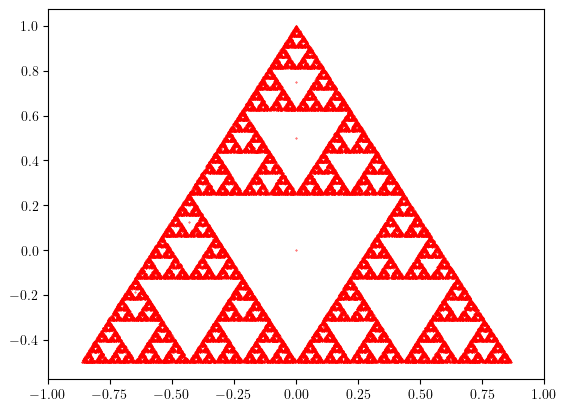

In [113]:
import numpy as np
import matplotlib.pyplot as plt

#image_size = np.array((300, 300))
r, nsides, npts = 0.5, 3, 50000

#r = nsides/(nsides+3)

pts = np.empty((npts,2))
#offset = 0.0
offset = 0.5*np.pi

vertices = np.array([(np.cos(phi), np.sin(phi)) for phi in
                                    np.arange(0. + offset, 2*np.pi + offset, 2.*np.pi/nsides)])
print(vertices)

pts[0,:] = 0.0, 0.0

for i in range(npts-1):
    sample = np.random.randint(nsides)
    pts[i+1,:] = r*vertices[sample,:] + (1-r)*pts[i,:] 

plt.scatter(pts[:,0],pts[:,1],color='r', marker='.', s=0.5)
plt.xlim([-1., 1])
plt.show()